<a href="https://colab.research.google.com/github/Rosangelafl/SUS-Estudos-e-analises/blob/master/covid_br_1set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid 19 com a base de dados do Ministério da Saúde, baixada em 1 de setembro de 2020.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

low_memory=False
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90


In [ ]:
df = pd.read_excel('/content/drive/My Drive/dados_covid/ITC DADOS COVID-19/painel_covid_01set.xlsx', parse_dates=['data'])
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [ ]:
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

In [ ]:
df.drop(columns=['municipio', 'coduf', 'codmun', 'codRegiaoSaude','populacaoTCU2019','Recuperadosnovos', 
                 'emAcompanhamentoNovos', 'interior/metropolitana'], inplace=True)

In [ ]:
df.columns

Index(['regiao', 'estado', 'nomeRegiaoSaude', 'data', 'semanaEpi',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos'],
      dtype='object')

In [ ]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    30375
RJ    16217
CE     8447
PE     7614
PA     6176
BA     5448
MG     5364
AM     3661
RS     3501
MA     3457
PR     3345
GO     3212
ES     3181
MT     2786
DF     2573
PB     2465
SC     2301
RN     2265
AL     1895
SE     1867
PI     1843
RO     1155
MS      889
TO      687
AP      663
AC      616
RR      593
Name: obitosAcumulado, dtype: int64

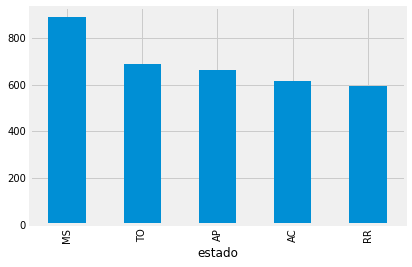

In [ ]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False).tail(5).plot(kind='bar')

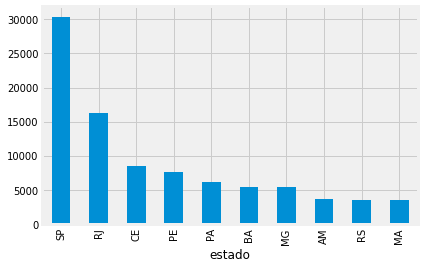

In [ ]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
df['total_cases'] = df[['estado', 'data', 'casosAcumulado', 'obitosAcumulado']].sum(axis=1)

In [ ]:
df.head()

,regiao,estado,nomeRegiaoSaude,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,total_cases
0,Brasil,NaN,NaN,2020-02-25,9,0,0,0,0,0
1,Brasil,NaN,NaN,2020-02-26,9,1,1,0,0,1
2,Brasil,NaN,NaN,2020-02-27,9,1,0,0,0,1
3,Brasil,NaN,NaN,2020-02-28,9,1,0,0,0,1
4,Brasil,NaN,NaN,2020-02-29,9,2,1,0,0,2


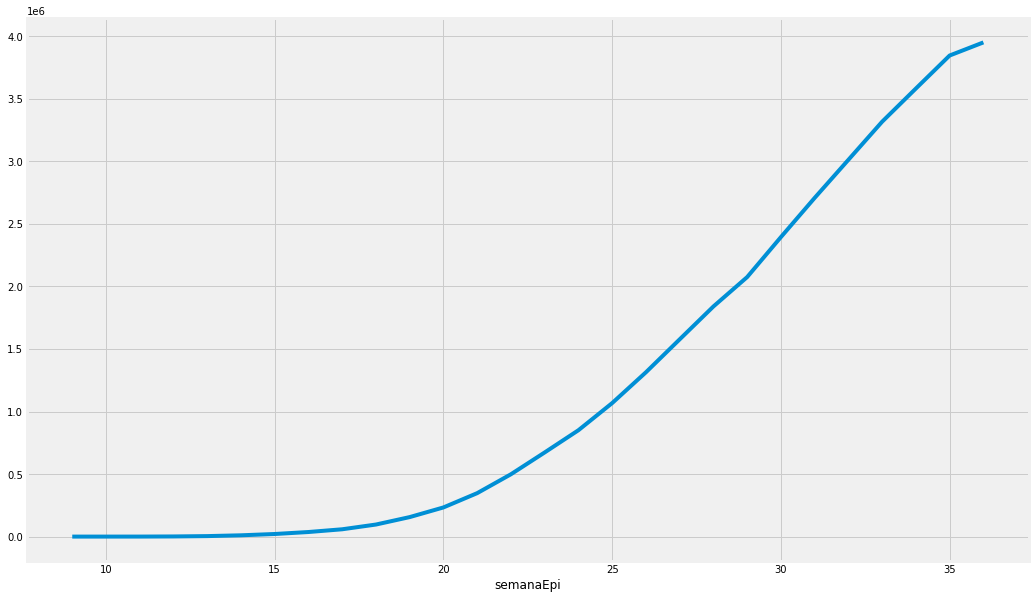

In [ ]:
df.groupby('semanaEpi')['casosAcumulado'].max().sort_values(ascending=False).plot(figsize=(16,10))

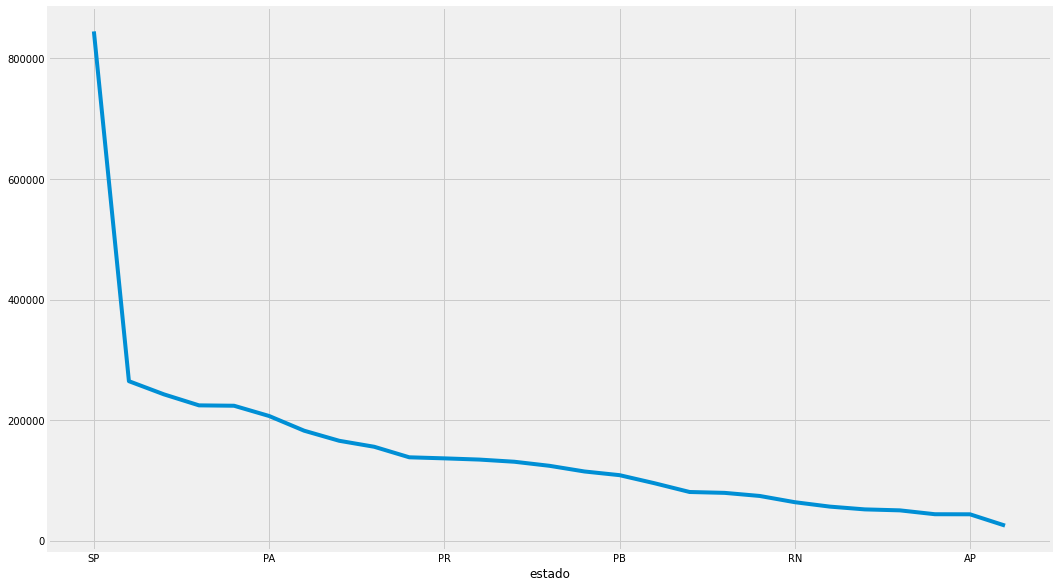

In [ ]:
df.groupby('estado')['total_cases'].max().sort_values(ascending=False).plot(figsize=(16,10))

In [ ]:

df['dia_morte'] = df['total_cases'].sub(df['total_cases'].shift())
df['acumulado_dia']= df['obitosAcumulado'].sub(df['obitosAcumulado'].shift())
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

ax.bar(df['data'], df['dia_morte'], color='blue', label='Mortos por dia')
ax.bar(df['data'], df['acumulado_dia'], color='red', label='Óbitos acumulados por dia')

plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.agrupado = df.groupby(['semanaEpi', 'data'])['obitosAcumulado', 'obitosNovos'].sum().reset_index()
df.agrupado.head()

,semanaEpi,data,obitosAcumulado,obitosNovos
0,9,2020-02-25,0,0
1,9,2020-02-26,0,0
2,9,2020-02-27,0,0
3,9,2020-02-28,0,0
4,9,2020-02-29,0,0


In [ ]:
df.agrupado.sort_values(by='obitosNovos', ascending=False)

,semanaEpi,data,obitosAcumulado,obitosNovos
155,31,2020-07-29,270402,4785
100,23,2020-06-04,102063,4419
162,32,2020-08-05,291736,4279
119,26,2020-06-23,157935,4122
147,30,2020-07-21,244461,4101
...,...,...,...,...
17,11,2020-03-13,0,0
18,11,2020-03-14,0,0
19,12,2020-03-15,0,0
20,12,2020-03-16,0,0


In [ ]:
temp = df.groupby(['semanaEpi', 'data'])['obitosAcumulado', 'obitosNovos'].sum().reset_index()

In [ ]:
temp.head()

,semanaEpi,data,obitosAcumulado,obitosNovos
0,9,2020-02-25,0,0
1,9,2020-02-26,0,0
2,9,2020-02-27,0,0
3,9,2020-02-28,0,0
4,9,2020-02-29,0,0


In [ ]:
temp.sort_values(by='obitosNovos', ascending=False)

,semanaEpi,data,obitosAcumulado,obitosNovos
155,31,2020-07-29,270402,4785
100,23,2020-06-04,102063,4419
162,32,2020-08-05,291736,4279
119,26,2020-06-23,157935,4122
147,30,2020-07-21,244461,4101
...,...,...,...,...
17,11,2020-03-13,0,0
18,11,2020-03-14,0,0
19,12,2020-03-15,0,0
20,12,2020-03-16,0,0


In [ ]:
temp = temp.melt(id_vars='data', value_vars=['obitosAcumulado', 'obitosNovos'], 
                 var_name='Case', value_name='Count')

In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [ ]:
acumulados = '#00008B'
novos = '#6A5ACD'

In [ ]:
import plotly.express as px
fig = px.area(temp, 
              x='data', 
              y="Count", 
              color='Case', 
              height= 600,
              title='Óbitos por Covid 19 até 1 de setembro de 2020',
              color_discrete_sequence = [acumulados, novos])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 1.9MB/s 


In [ ]:
import chart_studio
import chart_studio.plotly as cs_py
chart_studio.tools.set_credentials_file(username='Rosangelafl', api_key='..................')
cs_py.plot(fig, filename='Óbitos por Covid 19 até 1 de setembro de 2020', auto_open=True)


'https://plotly.com/~Rosangelafl/21/'